# A collection of domains that spread unreliable information

**License**: You can use the code in this script according to a [CC-BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/deed.en) license.

The collection started on a list of sources referenced by [Galotti et al. 2020](https://www.nature.com/articles/s41562-020-00994-6#Sec4) and was since expanded with updated versions of the initial domain collections and extended by additional curated lists. A cleaned and de-duplicated list ist stored under ```data/clean```.

## Collection descriptions

The lists that are ingested and combined into a larger list below stem from several sources. Some of them fact-checking collectives, some of them individual scholars or journalists that collected and curated lists of domains that spread unreliable information. Snapshots of the lists that were taken on May 18th 2021 are stored under ```data/raw```. The table below lists the individual collections included in this meta-list:

| Author | Article | List source | Included | Last update | Note | License |
| ------ | ------- | ----------- | -------- | ---------- | ---- | ------- |
| Melissa Zimdars | https://www.washingtonpost.com/posteverything/wp/2016/11/18/my-fake-news-list-went-viral-but-made-up-stories-are-only-part-of-the-problem/ | https://docs.google.com/document/d/10eA5-mCZLSS4MQY5QGb5ewC3VAL6pLkT53V_81ZyitM/preview | yes | 2016 | It is a bit unclear when this list was last updated | [CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/) |
Buzzfeed | https://www.buzzfeednews.com/article/craigsilverman/inside-the-partisan-fight-for-your-news-feed | https://github.com/BuzzFeedNews/2017-08-partisan-sites-and-facebook-pages/tree/master/data | yes | 2018-08-08 | | none specified |
Fake news watch | https://web.archive.org/web/20180213181029/http://www.fakenewswatch.com/ | https://web.archive.org/web/20180213181029/http://www.fakenewswatch.com/ | yes | 2016-01-18 | | none specified |
Politifact | https://www.politifact.com/article/2017/apr/20/politifacts-guide-fake-news-websites-and-what-they/ | https://e.infogr.am/politifacts_fake_news_almanac?parent_url=https%3A%2F%2Fwww.politifact.com%2Farticle%2F2017%2Fapr%2F20%2Fpolitifacts-guide-fake-news-websites-and-what-they%2F&src=embed# | yes | 2017-11-09 | | none specified |
Fletcher et al. | https://reutersinstitute.politics.ox.ac.uk/our-research/measuring-reach-fake-news-and-online-disinformation-europe | Is a compilation of individual smaller lists (Butac, Bufale, Bufalopedia and Décodex) in itself | see below | see below | several smaller lists, mainly focused on Italian and French misinformation spreading domains | see below |
Butac | https://reutersinstitute.politics.ox.ac.uk/our-research/measuring-reach-fake-news-and-online-disinformation-europ | https://www.butac.it/the-black-list/ | yes | 2021-05-18 | Mostly italian sites, domain names cleaned and expanded manually, facebook pages excluded | none specified |
Bufale | https://reutersinstitute.politics.ox.ac.uk/our-research/measuring-reach-fake-news-and-online-disinformation-europ | https://www.bufale.net/the-black-list-la-lista-nera-del-web/ | yes | 2018 | labels translated to English by italian native speaker | none specified |
Bufalopedia | https://reutersinstitute.politics.ox.ac.uk/our-research/measuring-reach-fake-news-and-online-disinformation-europ | https://bufalopedia.blogspot.com/p/siti-creatori-di-bufale.html | yes | 2020-05-05 | Mostly Italian sites, some international, changed label of “the onion” from fake news to satire. “Fake news” label reflects international sites | none specified |
Décodex | https://reutersinstitute.politics.ox.ac.uk/our-research/measuring-reach-fake-news-and-online-disinformation-europ | https://www.lemonde.fr/verification/ | no | unknown | French fact checking service from le Monde, no access established yet | |
Girnberg et al. | https://science.sciencemag.org/content/363/6425/374.abstract | https://github.com/LazerLab/twitter-fake-news-replication/blob/master/domains/domain_coding/data/black_sites.txt | yes | 2019-01-28 | | none specified |
Media bias fact check | https://mediabiasfactcheck.com/ | Various sub-sites with link lists | yes | 2021-05-21 | domains are labelled by the sub-site they appear on | none specified |
Snopes’ field guide to fake news sites | | https://www.snopes.com/news/2016/01/14/fake-news-sites/ | see below | 2016-01-14 | one of the sources of the CJR list | see below |
FakeNewsCodes | | http://www.fakenewscodex.com/ | see below | 2018-12-05 | one of the sources of the CJR list | see below |
FactCheck.org | | https://www.factcheck.org/2017/07/websites-post-fake-satirical-stories/ | see below | 2018-11-02 | one of the sources of the CJR list | see below |
Columbia Journalism review | https://www.cjr.org/fake-beta | https://www.cjr.org/fake-beta and more detailed data at https://docs.google.com/spreadsheets/d/1ck1_FZC-97uDLIlvRJDTrGqBk0FuDe9yHkluROgpGS8/edit#gid=2037798083 | yes | 2021-04 | Up-to-date compilation of lists from FactCheck.org, FakeNewsCodex, OpenSources, PolitiFact and Snopes. Entries with more than one label were expanded into several rows | none specified |

In [23]:
import pandas as pd
import numpy as np
from os.path import join
import seaborn as sns
import re

import requests
import os
import json
import matplotlib.pyplot as plt

## Combine domain lists

### Read the raw data

In [2]:
# source/author : latest update
sources = {'bufale':'2018',
           'bufalopedia':'2020-05-05',
           'butac':'2021-05-18',
           'buzzfeed':'2017-08-08',
           'columbia_journalism_review':'2021-04',
           'fake_news_watch':'2016-01-18',
           'girnberg':'2019-01-28',
           'media_bias_fact_check':'2021-05-17',
           'politifact':'2017-11-09',
           'zimdars':'2016'}

In [3]:
src  = 'data/raw'
domain_list = pd.DataFrame()
for source, updated in sources.items():
    fname = '{}_{}.csv'.format(source, updated)
    print(fname)
    tmp = pd.read_csv(join(src, fname), usecols=['url', 'label'])
    tmp['source'] = source
    tmp['last_update'] = updated
    domain_list = pd.concat([domain_list, tmp])
domain_list = domain_list.reset_index(drop=True)
domain_list.head(3)

bufale_2018.csv
bufalopedia_2020-05-05.csv
butac_2021-05-18.csv
buzzfeed_2017-08-08.csv
columbia_journalism_review_2021-04.csv
fake_news_watch_2016-01-18.csv
girnberg_2019-01-28.csv
media_bias_fact_check_2021-05-17.csv
politifact_2017-11-09.csv
zimdars_2016.csv


,url,label,source,last_update
0,http://notiziepericolose.blogspot.it/,false satire,bufale,2018
1,http://www.ilmattoquotidiano.it/,false satire,bufale,2018
2,http://www.ilmessaggio.it/,false satire,bufale,2018


### Sanitize domains

In [4]:
domain_list = domain_list.dropna(subset=['url']).reset_index(drop=True)

In [5]:
# Handlabel all domains not matching an URL
# r"[-a-zA-Z0-9@:%._\+~#=]{2,256}\.[a-z]{2,}\b([-a-zA-Z0-9@:%_\+.~#?&//=]*)" (adjusted from https://regexr.com/37i6s)
src  = 'data/resources'
dict_records = pd.read_csv(join(src, "missing_urls.csv")).to_dict(orient="records")
domain_list["url"] = domain_list["url"].replace({record["entry"]: record["url"] for record in dict_records})

In [6]:
def clean_url(url):
    # reformat entries that have the domain after a general name in parantheses
    enclosed_parantheses = r".+\s\(([^\(\)]+)\)"
    if re.match(enclosed_parantheses, url):
        findings = re.findall(enclosed_parantheses, url)
        if len(findings) > 0:
            url = findings[-1]
    # trailing "/" and spaces
    url = url.strip('/').strip()
    # transform all domains to lowercase
    url = url.lower()
    # remove any white spaces
    url = url.replace(' ', '')
    # if present: remove the protocol
    if url.startswith(("http", "https")):
        url = url.split('//')[1]
    # remove "www." 
    url = url.replace('www.', '')
    return url

In [7]:
domain_list['url'] = domain_list['url'].apply(clean_url)

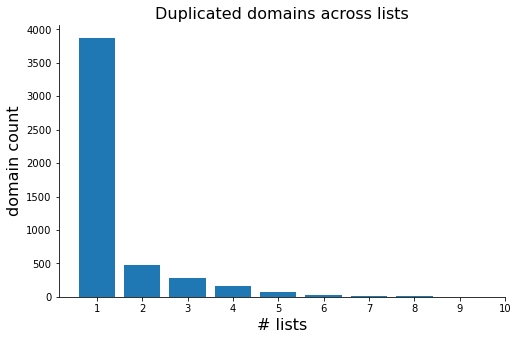

In [8]:
fig, ax = plt.subplots(figsize=(8, 5))
list_count = domain_list['url'].value_counts()
ax.hist(list_count, rwidth=0.8, align='left',
        bins=range(1, list_count.max() + 1))
ax.set_ylabel('domain count', fontsize=16)
ax.set_xlabel('# lists', fontsize=16)
ax.set_xticks(range(1, list_count.max() + 1))
ax.set_title('Duplicated domains across lists', fontsize=16)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

### Map labels to accuracy/transparency scores and reliability types

### Accuracy
The accuracy score relates to the credibility or tells how fact-based the news outlet reports. It ranges from 1 (no accuracy) to 5 (high accuracy).

| Label      	        | Score 	| Description                                                                 	|    Type    	|
|-------------------	|:-----:	|-----------------------------------------------------------------------------	|:----------:	|
| False information  	|   1   	| No or very little accuracy (e.g. fake news, conspiracy, satire)             	| Unreliable 	|
| Clickbait  	        |   2   	| News with some truthness or facts, but actually misleading (e.g. clickbait) 	| Unreliable 	|
| Biased     	        |   3   	| Mixed accuracy, hide/report half of the truth (e.g. bias, state)            	|  Reliable  	|
| Mainstream 	        |   4   	| Low bias/mainstream media (e.g. center right/left bias)                     	|  Reliable  	|
| Scientific 	        |   5   	| No bias/scientific news                                                     	|  Reliable  	|

### Transparency
The transparency score rates for instance how open/honest the news outlet is about telling the truth or not. It also includes a news source’s intention for fact-based reportage.

| Label              	| Score 	| Description                                                                                                                                         	|    Type    	|
|--------------------	|:-----:	|-----------------------------------------------------------------------------------------------------------------------------------------------------	|:----------:	|
| No Transparency    	|   1   	| Intentionally misleading or no information about editorial process (e.g. fake news, conspiracy)                                                     	| Unreliable 	|
| Mixed Transparency 	|   2   	| Sites with (partially) transparent intention, but can still be misunderstood because of the way articles are written (e.g. bias, clickbait, satire) 	|  Reliable  	|
| Transparent        	|   3   	| Sites with transparent editorial or legal notice (e.g. mainstream, scientific news)                                                                 	|  Reliable  	|

In [9]:
src = "data/resources"
new_labels = pd.read_csv(join(src, "labels.csv")).sort_values(by="label")
new_labels = new_labels.drop_duplicates().dropna()
new_labels[["accuracy", "transparency"]] = new_labels[["accuracy", "transparency"]].astype(int)
new_labels

,label,accuracy,transparency
42,Fake news,1,1
41,Imposter site,1,1
43,Parody site,1,2
44,Some fake stories,2,1
22,bias,3,2
35,center right bias,4,3
51,clickbait,2,2
12,close to Qanon,1,1
47,conspiracy,1,1
19,conspiracy blogs,1,1


In [10]:
# Remove domains with Zimdars label "hate" or "unknown"
# source == 'Zimdars' & (label == 'hate' | label == 'unknown')
domain_list = domain_list.query("source != 'zimdars' | (label != 'hate' & label != 'unknown')")

In [11]:
domain_list["label"] = domain_list["label"].str.lower()
new_labels["label"] = new_labels["label"].str.lower()
labeled_domains = domain_list.merge(new_labels, on="label", how="outer")

In [12]:
assert labeled_domains[["accuracy", "transparency"]].isna().any().any() == False

## De-duplication

### Drop hard duplicates

Drop domains that have the same harm score across all their source lists

### Drop hard duplicates

Drop domains that have the same harm score across all their source lists

In [13]:
labeled_domains = labeled_domains.drop_duplicates(subset=['url', 'accuracy', 'transparency'])

### Drop soft duplicates, keep lowest accuracy/transparency score

In [14]:
print('{}/{} are soft duplicates'.format(\
    len(labeled_domains) - len(labeled_domains['url'].unique()), 
    len(labeled_domains)))

655/5422 are soft duplicates


In [15]:
domain_counts = labeled_domains['url'].value_counts()
soft_duplicates = domain_counts[domain_counts > 1].index

In [16]:
labeled_domains[labeled_domains['url'] == 'madworldnews.com'].sort_values(by=["accuracy", "transparency"])

,url,label,source,last_update,accuracy,transparency
999,madworldnews.com,fake news,girnberg,2019-01-28,1,1
3991,madworldnews.com,unreliable,columbia_journalism_review,2021-04,2,1
126,madworldnews.com,clickbait,columbia_journalism_review,2021-04,2,2
3098,madworldnews.com,right bias,buzzfeed,2017-08-08,3,2


In [17]:
for sd in soft_duplicates:
    sd_domains = labeled_domains[labeled_domains['url'] == sd].sort_values(by=["accuracy", "transparency"])
    labeled_domains = labeled_domains.drop(sd_domains.index[1:])    # Keep only row with minimum accuracy and transparency
labeled_domains = labeled_domains.reset_index(drop=True)

In [18]:
# make sure that the list only contains unique domains now
assert len(labeled_domains) == len(labeled_domains['url'].unique())

In [19]:
print('there are {} unique domains left'.format(len(labeled_domains)))

there are 4767 unique domains left


## Assign reliability label

In [24]:
labeled_domains['type'] = np.where((labeled_domains["accuracy"] < 3) & (labeled_domains["transparency"] < 2), "unreliable", "reliable")

In [25]:
labeled_domains.to_csv('data/clean/domain_list_clean.csv', index=False)